# Agenda 

## 1 - NLP Basics: Introduction and Setup

## 2 - Vector space model pipelines

## 3 - Cleaning text

## 4 - Tokenization

## 5 - More preprocessing
   #### Stopwords, stemming. lemmatizing 

## 6 - Vectorizing data 
   #### Count vectorization

# 1 - NLP Basics: What is Natural Language Processing & the Natural Language Toolkit?
### How to install NLTK on your local machine


**Mac/Unix**

From the terminal:
1. Install NLTK: run `pip install -U nltk`
2. Test installation: run `python` then type `import nltk`

**Windows**

1. Install NLTK: [http://pypi.python.org/pypi/nltk](http://pypi.python.org/pypi/nltk)
2. Test installation: `Start>Python35`, then type `import nltk`

### Download NLTK data

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 2 - Vector Space Model Pipeline

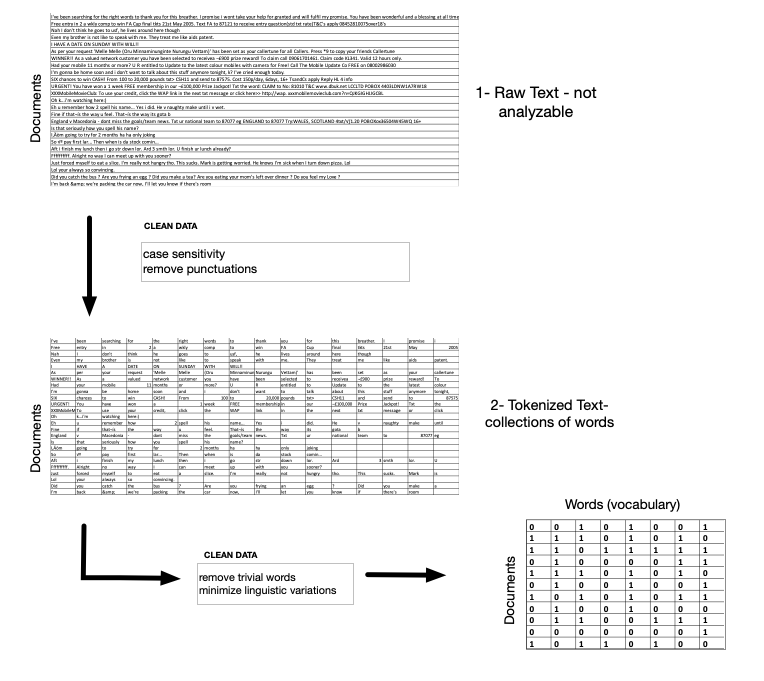

### Let's read data

In [37]:
import pandas as pd

In [6]:
sms=pd.read_csv('data/SMSSpamCollection.tsv', sep='\t', header=None)

# 3 - Cleaning text

Remove punctionation (regex can help ) 

In [ ]:
re.sub( r'[^\w\s]', text)

Convert text to lower case 

In [90]:
'Apple'=='apple'

False

In [91]:
sms['clean_text']=sms['text'].str.replace(r'[^\w\s]',' ').str.lower()

In [204]:
## Alternative method

import re #for regular expressions


def remove_punct(text):
    non_punct= re.sub(r'[^\w\s]',' ',text).lower()
    return non_punct

In [205]:
sms['clean_text']=sms['text'].apply(remove_punct)

# 4 -  Tokenization

In [98]:
sms['words']=sms['clean_text'].str.split(r'\W+')

In [206]:
## Alternatively 

def tokenize_text(text):
    words= text.split(r'\W+')
    return words

In [207]:
sms['words']=sms['clean_text'].apply(tokenize_text)

# 5 - More preprocessing
 
 ## Stopwords
 ## Stemming and Lemmatizing
 

## Stopwords

In [96]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [101]:
def remove_stops(words):
    return [word for word in words if word not in stopword]

In [178]:
sms['non_stop_words']=sms['words'].apply(remove_stops)

## Stemmers and Lemmatizers

### Test out WordNet lemmatizer (read more about WordNet [here](https://wordnet.princeton.edu/))

In [109]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()


In [119]:
print(wn.lemmatize('teach'))
print(wn.lemmatize('teaching'))

print(ps.stem('teach'))
print(ps.stem('teaching'))

teach
teaching
teach
teach


In [121]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

print(ps.stem('goose'))
print(ps.stem('geese'))

goose
goose
goos
gees


In [124]:
def lemmatize(words):
    return [wn.lemmatize(word) for word in words ]

In [176]:
sms['lemmatized']= sms['non_stop_words'].apply(lemmatize)

In [177]:
sms['clean_text']=sms['lemmatized'].str.join(' ')

## Bringing all together

In [197]:
def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   ### Remove punctuation by removing non-space alpha-num characters
    words=re.split(r'\W+', text)                   ### Split by remaining non-alphanumeric characters 
    non_stop_words=[word for word in words if word not in stopword]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

In [200]:
sms['clean_text']=sms['text'].apply(clean)

## Vectorizing Data

Process of encoding text as integers to create word frequency columns for each unique word in the dataset.
In the context of machine learning:  
- each word is a **feature**
- each text (row) is represented as an n-dimensional vector of word counts called **feature vector**

Machine learning libraries can help with constructing feature vectors.  
**scikit-learn** is a good one.   
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

<p>
<p>

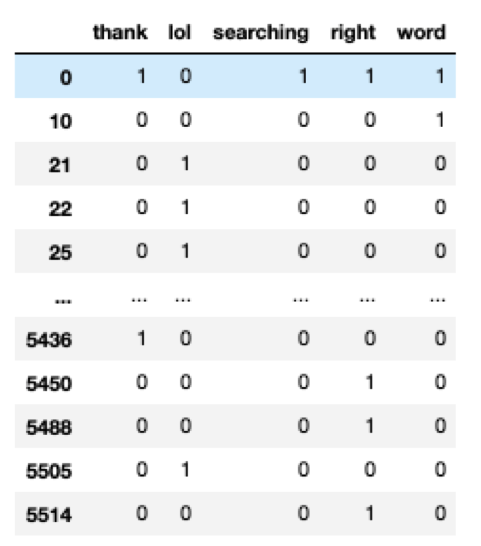

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
count_vect=CountVectorizer()

In [152]:
X_counts = count_vect.fit_transform(sms['clean_text'])

In [283]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [153]:
vocab=count_vect.get_feature_names()

In [154]:
vs_model=pd.DataFrame(X_counts.toarray(), columns=vocab)

In [213]:
vs_model

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
vs_model[['offer','thank','brother']]

,offer,thank,brother
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
5563,0,0,0
5564,0,0,0
5565,0,0,0
5566,0,0,0
